2023/01/11

2132i

damn... I dont feel tired but I dont wont to do anything

lets get init

##Soft Max classification with more then 3 class##

In [2]:
import torch
import torch.optim as optim
import random

#data stuctures
feature = 4 #inputs
data = 8 #how many data
start_range = 1 #range of start
end_range = 9 #range of end
count_class = 3 #class count

x_train = [[random.randrange(start_range,end_range) for i in range(feature)] for i in range(data)]

print(x_train)

y_train = [random.randrange(0,count_class) for i in range(data)]

print(y_train)

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)#becasue scatter only gets long tensors

print(x_train)
print(y_train)

[[8, 2, 2, 8], [6, 7, 7, 8], [4, 1, 8, 5], [4, 5, 8, 5], [5, 3, 2, 4], [5, 7, 7, 5], [6, 1, 1, 2], [4, 4, 1, 7]]
[2, 0, 0, 0, 1, 0, 1, 2]
tensor([[8., 2., 2., 8.],
        [6., 7., 7., 8.],
        [4., 1., 8., 5.],
        [4., 5., 8., 5.],
        [5., 3., 2., 4.],
        [5., 7., 7., 5.],
        [6., 1., 1., 2.],
        [4., 4., 1., 7.]])
tensor([2, 0, 0, 0, 1, 0, 1, 2])


##Prepare data and stucture

In [25]:
def how_many_number_type_torch(list):#I made this to see how many nuber types there are (little bit important)
  list = list.tolist()#this is for torch list
  list.sort()
  cnt = 1
  first = list[0]
  for i in range(1, len(list)):
    if list[i-1] != list[i]:
      cnt = cnt + 1
  return cnt



print(y_train.unsqueeze(1))#unsqeeze is making a demention and the (numberhere) means in what demetion 

nb_class = how_many_number_type_torch(y_train) # how many class?

nb_data = len(y_train) #how many data?

y_one_hot = torch.zeros(nb_data,nb_class) #IDK why people call it hot
y_one_hot.scatter_(1,y_train.unsqueeze(1),1) #(index standard,making a 2 dimention long list and index(only long tensors), fill it up as 1)

print(y_one_hot)


tensor([[2],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [2]])
tensor([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
7


#Actual learning

In [26]:
import torch.nn.functional as F #fucntional means its same as nn but nn is class and funciontal is function

data = 8 #catuion ! you have to match this with the top data

W = torch.zeros((feature,nb_class), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#set optimizer
optimizer = optim.SGD([W,b], lr=0.01)
nb_epochs = 1000



#graph ready
y_hypothesis_list = []
y_hypothesis_percent = []


#leaning
for epoch in range(nb_epochs + 1):
  
  #Calculate Cost
  hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)#soft max is that (in very short) sum of all is 1 //dim = 1 means 2nd dimention 
  

  
  #cost calculation 1
  #y_one_hot = torch.zeros(nb_data,nb_class) 
  #y_one_hot.scatter_(1,y_train.unsqueeze(1),1)
  
  cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim = 1))).sum(dim=1).mean()
  
  #second way to calculate cost :
  #if you use cross_entropy you dont have to use scatter  // basicly the short cut same thing
  
  #inhace cost 
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  
  #change so we can print
  hypothesis_list = hypothesis.tolist()

  
  #if epoch % 100 == 0:
    
  
  
  if epoch % 100 == 0:#for every 100 times
    
    y_templist1 = []
    y_templist2 = []
    
    for i in range(0,data):
      #status
      print("data %d is %d with %f%% posibility"%(i,hypothesis_list[i].index(max(hypothesis_list[i])),max(hypothesis_list[i])*100))
      
      
      #graph
      y_templist1.append(hypothesis_list[i].index(max(hypothesis_list[i])))#making temp list
      y_templist2.append(max(hypothesis_list[i]))#making temp list
      
      
    y_hypothesis_list.append(y_templist1)#appending the temp list to make a 2 dimensional array
    y_hypothesis_percent.append(y_templist2)#appending the temp list to make a 2 dimensional array

    print("Epoch :%4d/%d Cost: %f"%(epoch,nb_epochs,cost.item()))

data 0 is 0 with 33.333334% posibility
data 1 is 0 with 33.333334% posibility
data 2 is 0 with 33.333334% posibility
data 3 is 0 with 33.333334% posibility
data 4 is 0 with 33.333334% posibility
data 5 is 0 with 33.333334% posibility
data 6 is 0 with 33.333334% posibility
data 7 is 0 with 33.333334% posibility
Epoch :   0/1000 Cost: 1.098612
data 0 is 2 with 68.872654% posibility
data 1 is 0 with 85.365266% posibility
data 2 is 0 with 89.089209% posibility
data 3 is 0 with 93.461615% posibility
data 4 is 2 with 41.323712% posibility
data 5 is 0 with 90.927821% posibility
data 6 is 2 with 42.057136% posibility
data 7 is 2 with 62.155563% posibility
Epoch : 100/1000 Cost: 0.798992
data 0 is 2 with 74.407506% posibility
data 1 is 0 with 89.110279% posibility
data 2 is 0 with 94.271457% posibility
data 3 is 0 with 97.109836% posibility
data 4 is 2 with 40.635827% posibility
data 5 is 0 with 94.924212% posibility
data 6 is 1 with 55.337745% posibility
data 7 is 2 with 75.415677% posibility


what we need : [2, 0, 0, 0, 1, 0, 1, 2]
green = 0
purple : 1
red : 2


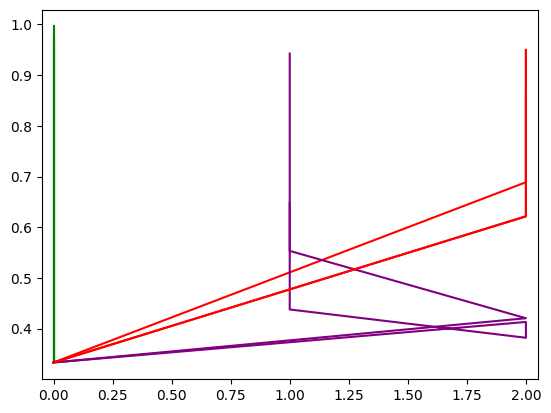

explation : the y axis means the percentiage of the data 


In [27]:
#graph

import matplotlib.pyplot as plt


#explain
print("what we need : ",end="")
print(y_train.tolist())


datas = 8 #caution! you have to match this with the top data

for data in range(0,datas):
  data_yline = []
  data_yline_percent = []
  for epoch in range(0,11):#how many times they made this list
    data_yline.append(y_hypothesis_list[epoch][data])
    data_yline_percent.append(y_hypothesis_percent[epoch][data])
  if y_train[data].item() == 0:
    plt.plot(data_yline,data_yline_percent,color = 'green')
  elif y_train[data].item() == 1:
    plt.plot(data_yline,data_yline_percent,color = 'purple')
  elif y_train[data].item() == 2:
    plt.plot(data_yline,data_yline_percent,color = 'red')

    



  
plt.plot(data_yline,data_yline_percent,color = 'red')
plt.xlim(-0.05,2.05)
print("green = 0\npurple : 1\nred : 2")
plt.show()
print("explation : the y axis means the percentiage of the data ")

#Data **evaluation**

In [41]:


#explain
print("What we need : ",end="")
print(y_train.tolist())


prediction = torch.argmax(hypothesis,dim=1)#argmax returns the INDEX #dim = 0 means max in column // dim = 1 means max in row

evaluation =  y_train == prediction

print(str(evaluation.sum().item()/len(evaluation)*100)+"%")

What we need : [2, 0, 0, 0, 1, 0, 1, 2]
100.0%
